## Importations

In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as sql
import configparser
import datetime
import seaborn as sns
import matplotlib.pyplot as plt 

## Configuration

In [2]:
config = configparser.ConfigParser()
config.read('../config/default.ini')

['../config/default.ini']

In [3]:
engine = sql.create_engine('postgresql://{}:{}@{}:{}/{}'.format(config['DATABASE']['username'], config['DATABASE']['password'].replace('_percentage_', '%'), config['DATABASE']['host'], config['DATABASE']['port'], config['DATABASE']['database']))

## Utilitaires

In [4]:
def export_df(df, name, date=True):
    df.to_csv('output/{}{}.csv'.format('{}_'.format(datetime.datetime.strftime(datetime.datetime.now(), '%y%m%d')) if date else '', name), index=False, encoding='utf-8-sig')

In [5]:
def export_fig(plot, name, date=True):
    plot.savefig('images/{}{}.png'.format('{}_'.format(datetime.datetime.strftime(datetime.datetime.now(), '%y%m%d')) if date else '', name))

## Données

In [11]:
df = pd.read_csv('/home/meili/OneDrive/Documents/02_gestion_donnees/02_Données/03_Transformation/Results/201120_device_conso_chartbeat.csv', parse_dates=['tz_time'])
df.head()

tz_time  device   section  page_views
0 2020-10-30  mobile  rtbfinfo     1586705
1 2020-10-16  mobile  rtbfinfo     1259116
2 2020-11-04  mobile  rtbfinfo     1248211
3 2020-10-23  mobile  rtbfinfo     1088353
4 2020-11-06  mobile  rtbfinfo     1001122

In [12]:
df['section'].unique()

array(['rtbfinfo', 'rtbfsport', 'media', 'no section', 'vivacite',
       'lapremiere', 'rtbftendance', 'classic21', 'tv', 'rtbfhome',
       'tipik', 'rtbfculture', 'musiq3', 'rtbfservices', 'mediaz',
       'ouftivi', 'purefm', 'corporate', '{section}', 'rtbf1418', 'radio',
       'webcrea', 'irtbf', 'rtbf1418en', 'rtbfmix', 'ananas'],
      dtype=object)

In [13]:
df = df[df['section'].isin(['rtbfinfo', 'rtbfsport','vivacite', 'lapremiere', 'rtbftendance', 'classic21', 'tv', 'tipik', 'rtbfculture', 'musiq3'])]
df.head()

tz_time  device   section  page_views
0 2020-10-30  mobile  rtbfinfo     1586705
1 2020-10-16  mobile  rtbfinfo     1259116
2 2020-11-04  mobile  rtbfinfo     1248211
3 2020-10-23  mobile  rtbfinfo     1088353
4 2020-11-06  mobile  rtbfinfo     1001122

In [17]:
export_df(df, 'traffic_per_site_device')

In [15]:
df['month'] = df['tz_time'].dt.strftime('%m-%y')

In [47]:
export_df(df, 'conso_engaged_time')

In [48]:
len(df['path'].unique())

3647

In [50]:
np.max(df['tz_time'])

'2020-11-18 00:00'

In [23]:
df = df.sort_values('engaged_time', ascending=False)

In [25]:
df.head(20)

path  scroll_hist   section  page_total_time  page_views  \
965  rtbf.be/info/flux         8400  rtbfinfo           790586       12410   
970  rtbf.be/info/flux         8500  rtbfinfo           779539       12356   
989  rtbf.be/info/flux         8600  rtbfinfo           756444       12010   
951  rtbf.be/info/flux         8300  rtbfinfo           789937       12543   
901  rtbf.be/info/flux         8200  rtbfinfo           807726       13038   
885  rtbf.be/info/flux         8100  rtbfinfo           816005       13241   
993  rtbf.be/info/flux         8700  rtbfinfo           734203       11941   
859  rtbf.be/info/flux         7800  rtbfinfo           832232       13558   
856  rtbf.be/info/flux         8000  rtbfinfo           827959       13582   
878  rtbf.be/info/flux         7900  rtbfinfo           808116       13341   
820  rtbf.be/info/flux         7700  rtbfinfo           853286       14131   
816  rtbf.be/info/flux         7600  rtbfinfo           857820       14266   
797  rtbf.be/info/flux         7400  rtbfinfo           874180       14572   
808  rtbf.be/info/flux         7500  rtbfinfo           863141       14405   
942       rtbf.be/info         8000  rtbfinfo           752460       12627   
937  rtbf.be/info/flux         8800  rtbfinfo           751441       12654   
672  rtbf.be/info/flux         6800  rtbfinfo          1008230       17316   
643  rtbf.be/info/flux         6700  rtbfinfo          1045111       17986   
952  rtbf.be/info/flux         8900  rtbfinfo           727536       12531   
690  rtbf.be/info/flux         6900  rtbfinfo           962382       16583   

     engaged_time  
965     63.705560  
970     63.089916  
989     62.984513  
951     62.978315  
901     61.951680  
885     61.627143  
993     61.485889  
859     61.383095  
856     60.960021  
878     60.573870  
820     60.383978  
816     60.130380  
797     59.990393  
808     59.919542  
942     59.591352  
937     59.383673  
672     58.225341  
643     58.106916  
952     58.058894  
690     58.034252

In [18]:
df = df.sort_values(['path','scroll_hist'])

In [19]:
paths = df['path'].unique()

In [8]:
sections = list(df['section'].unique())
sections

['classic21',
 'corporate',
 'lapremiere',
 'media',
 'mediaz',
 'musiq3',
 'no section',
 'ouftivi',
 'purefm',
 'radio',
 'rtbf1418',
 'rtbfculture',
 'rtbfhome',
 'rtbfinfo',
 'rtbfservices',
 'rtbfsport',
 'rtbftendance',
 'tipik',
 'tv',
 'vivacite',
 'webcrea']

In [16]:
for section in sections:
    df_fil = df[df['section'] == section]
    df_fil = df_fil.sort_values(['section','scroll_hist'])
    df_fil['cumsum'] = df_fil['per_users'].cumsum()
    
    print(np.min(df_fil[df_fil['cumsum']>=0.5]['per_page']))

0.188679245283019
0
0.222222222222222
0
#DIV/0!
0.242424242424242
0.013513513513514
0.375
#DIV/0!
0
#DIV/0!
0.224489795918367
0.058823529411765
0.096385542168675
0.076923076923077
0.11
0.278688524590164
0.171428571428571
0.153846153846154
0.242424242424242
#DIV/0!


In [ ]:
df.isnull().any()

## Graphs

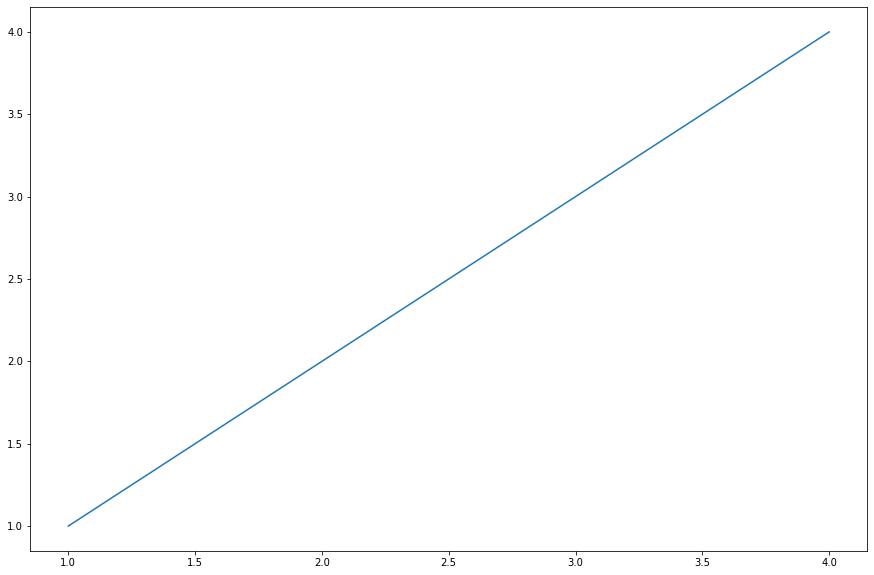

In [2]:
plt.figure(figsize = (15,10))
sns.lineplot(x=[1,2,3,4], y=[1,2,3,4])
plt.show()